# Data preparation of XPIE dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Lung_Segmentation

/content/gdrive/MyDrive/Lung_Segmentation


In [3]:
from DataPreprocessing import *
from ValidationAndPrediction import * 
from Model import *
import os
import re
import numpy as np
import pandas as pd
import natsort
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm
from glob import glob
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split, KFold

In [4]:
tf.__version__

'2.5.0'

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2670627237663032716
]


# 1. Preparing the XPIE dataset list

In [ ]:
train_image_path = 'XPIE/Images'
train_mask_path = 'XPIE/Grounds'
train_images, train_masks = train_filepath_list(train_image_path, train_mask_path)
print('Number of images: ', len(train_images))
print('Number of masks: ', len(train_masks))

Number of images:  10000
Number of masks:  10000


Display one of the images and masks as example:

['XPIE/Images/Y_E_1.jpg', 'XPIE/Images/Y_E_2.jpg', 'XPIE/Images/Y_E_3.jpg', 'XPIE/Images/Y_E_4.jpg', 'XPIE/Images/Y_E_5.jpg', 'XPIE/Images/Y_E_6.jpg', 'XPIE/Images/Y_E_7.jpg', 'XPIE/Images/Y_E_8.jpg', 'XPIE/Images/Y_E_9.jpg', 'XPIE/Images/Y_E_10.jpg']
Image shape:  (375, 500, 3)
Mask shape:  (375, 500)


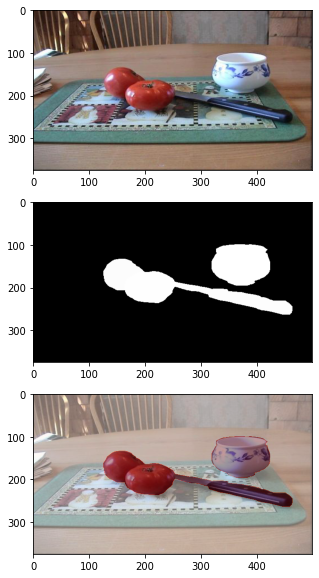

In [ ]:
print(train_images[:10])
image_display(train_images, train_masks, 0)

In [ ]:
xpie_df = pd.DataFrame(data={"filename": train_images, "mask": train_masks})
xpie_df.to_csv(path_or_buf='xpie_filepaths.csv')
display(xpie_df)

,filename,mask
0,XPIE/Images/Y_E_1.jpg,XPIE/Grounds/Y_E_1.png
1,XPIE/Images/Y_E_2.jpg,XPIE/Grounds/Y_E_2.png
2,XPIE/Images/Y_E_3.jpg,XPIE/Grounds/Y_E_3.png
3,XPIE/Images/Y_E_4.jpg,XPIE/Grounds/Y_E_4.png
4,XPIE/Images/Y_E_5.jpg,XPIE/Grounds/Y_E_5.png
...,...,...
9995,XPIE/Images/Y_P_621.jpg,XPIE/Grounds/Y_P_621.png
9996,XPIE/Images/Y_P_622.jpg,XPIE/Grounds/Y_P_622.png
9997,XPIE/Images/Y_P_623.jpg,XPIE/Grounds/Y_P_623.png
9998,XPIE/Images/Y_P_624.jpg,XPIE/Grounds/Y_P_624.png


# 2. Convert the images into grayscale 

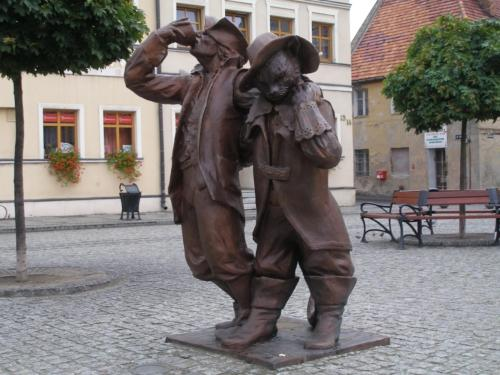

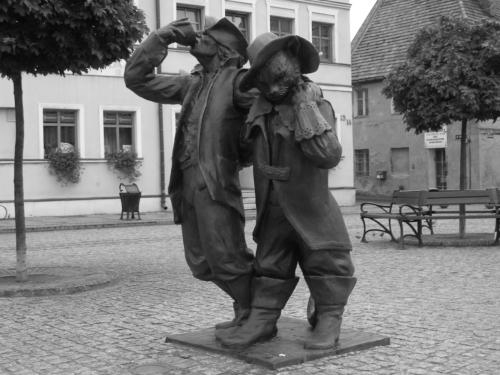

,filename,mask
0,XPIE/GrayImages/Y_E_1.png,XPIE/Grounds/Y_E_1.png
1,XPIE/GrayImages/Y_E_2.png,XPIE/Grounds/Y_E_2.png
2,XPIE/GrayImages/Y_E_3.png,XPIE/Grounds/Y_E_3.png
3,XPIE/GrayImages/Y_E_4.png,XPIE/Grounds/Y_E_4.png
4,XPIE/GrayImages/Y_E_5.png,XPIE/Grounds/Y_E_5.png
...,...,...
9995,XPIE/GrayImages/Y_P_621.png,XPIE/Grounds/Y_P_621.png
9996,XPIE/GrayImages/Y_P_622.png,XPIE/Grounds/Y_P_622.png
9997,XPIE/GrayImages/Y_P_623.png,XPIE/Grounds/Y_P_623.png
9998,XPIE/GrayImages/Y_P_624.png,XPIE/Grounds/Y_P_624.png


In [ ]:
# First do the conversion for IMAGES and then save it into new file and new filepath
# and then sin put into pandas Dataframe
from google.colab.patches import cv2_imshow

graytrain_images = []

for x in range(len(train_images)):

  image = cv2.imread(train_images[x])
  image_name = train_images[x].split('/')[-1].split('.')[0]
  graytrain_path = 'XPIE/GrayImages/'+image_name+'.png'

  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  cv2.imwrite(graytrain_path, gray)

  graytrain_images.append(graytrain_path)

cv2_imshow(image)
cv2_imshow(gray)

xpie_gray_df = pd.DataFrame(data={"filename": graytrain_images, "mask": train_masks})
xpie_gray_df.to_csv(path_or_buf='xpie_gray_filepaths.csv')
display(xpie_gray_df)

In [ ]:
# Redefine the input size of the images 
width = 256
height = 256
channel = 3